In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import *
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from time import time
import pickle

In [2]:
from xgboost import *

# data preparation

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "mkt_with_11_group_id_20170712.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 100)

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].dtypes

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].values
# train_df.groupby('BILL_DISTRICT_NAME').describe()

In [ ]:
X = train_df.values[:,:-1]
Y = train_df.values[:,-1]

In [ ]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [ ]:
label_encoded_y

# categorical feature encoding without one hot encode

In [3]:
sample = 0
# group_name = 'Adult'
group_name = 'InstantMessage-High'
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0730_sample/" + group_name + "/"
filename = "0729_marketing_with_picked_group11_numeric_max_min_sample_" + group_name + "_others_" + str(sample) + ".csv"
# filename = "0719_april_marketing_anylze_full_table_group11_max_min_train.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False)

In [4]:
# train_df = train_df[train_df['Groups'] != 'Infrequent_User']

train_df.groupby('Groups').count()

,DATA_MONTH,RENEW_IND,GA_IND,ACTV_TYPE,SRV_TYPE_DESC,GENDER_CODE,ORIG_OPR_ID,AGE,TENURE_SCV,BILL_CITY_NAME,...,CWC_CATG4_CNT,CWC_CATG5_CNT,CWC_CATG6_CNT,CWC_CATG7_CNT,CWC_CATG8_CNT,CWC_CATG9_CNT,CWC_CATG10_CNT,CWC_CATG11_CNT,CWC_CATG12_CNT,CWC_CATG13_CNT
Groups,,,,,,,,,,,,,,,,,,,,,
InstantMessage-High,349096,349096,349096,349096,349096,349096,349096,349096,349096,349096,...,349096,349096,349096,349096,349096,349096,349096,349096,349096,349096
Others,349090,349090,349090,349090,349090,349090,349090,349090,349090,349090,...,349090,349090,349090,349090,349090,349090,349090,349090,349090,349090


In [5]:
X_train = train_df.iloc[:, 0:-1].values
y_train = train_df.iloc[:, -1].values

In [6]:
param_grid = {
#     'max_depth':[3, 5],
#     'learning_rate':[0.1, 0.05, 0.2],
#     'n_estimators':[50, 100, 200]
#     'max_depth':[10],
#     'learning_rate':[0.05],
#     'n_estimators':[100],
    'max_depth':[8],
    'min_child_weight':[2],
#     'seed':[5],
    'gamma':[0.5]
#     'silent':[False]
#     'min_child_weight':[2]
}


In [7]:
t0 = time()
model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
# model = XGBClassifier(n_jobs = -1)
# kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs.fit(X_train, y_train)
print("training time:  %.2f" % (time()-t0))

training time:  303.38


In [15]:
import requests
requests.post(
        "https://api.mailgun.net/v3/sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org/messages",
        auth=("api", "key-a007a22faf334a3510137b6cc03c21a6"),
        data={"from": "Mailgun Sandbox <postmaster@sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org>",
              "to": "Toby <atch84@gmail.com>",
              "subject": "XGBoost Result",
              "text": str(gs.cv_results_)})

<Response [200]>

In [8]:
print(gs.best_score_)
print(gs.best_params_)
best_model = gs.best_estimator_

0.581177508572
{'min_child_weight': 2, 'gamma': 0.5, 'max_depth': 8}


In [9]:
gs.cv_results_

{'mean_fit_time': array([ 45.51379013]),
 'mean_score_time': array([ 0.66887174]),
 'mean_test_score': array([ 0.58117751]),
 'mean_train_score': array([ 0.6464957]),
 'param_gamma': masked_array(data = [0.5],
              mask = [False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [8],
              mask = [False],
        fill_value = ?),
 'param_min_child_weight': masked_array(data = [2],
              mask = [False],
        fill_value = ?),
 'params': ({'gamma': 0.5, 'max_depth': 8, 'min_child_weight': 2},),
 'rank_test_score': array([1]),
 'split0_test_score': array([ 0.68081754]),
 'split0_train_score': array([ 0.63501973]),
 'split1_test_score': array([ 0.52310634]),
 'split1_train_score': array([ 0.66333303]),
 'split2_test_score': array([ 0.47354927]),
 'split2_train_score': array([ 0.67282548]),
 'split3_test_score': array([ 0.59115421]),
 'split3_train_score': array([ 0.63890008]),
 'split4_test_score': array([ 0.63725947]),
 'split4_train_score': arra

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0719_april_marketing_anylze_full_table_group11_max_min_test.csv"
test_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
X_test = test_df.iloc[:, 0:-1].values
y_test = test_df.iloc[:, -1].values

In [50]:
pred = best_model.predict(X_train)

In [51]:
accuracy = accuracy_score(y_train, pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 71.23%


In [ ]:
pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

In [28]:
# labels = ['Adult', 'Game', 'HomeLife', 'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News', 'No_ignificant_preference', 'Portal', 'Social-media']
labels = train_df['Groups'].unique()
cnf_matrix = confusion_matrix(y_train, pred, labels=labels)

cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = labels
cnf_pd.index = labels
cnf_pd

,Adult,Others
Adult,42478,9806
Others,13544,38736


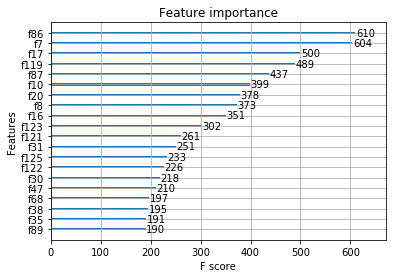

In [29]:
plot_importance(best_model, max_num_features = 20)
pyplot.show()

In [ ]:
import winsound
winsound.PlaySound('crows.wav', winsound.SND_FILENAME)

In [27]:
train_df.columns[119]

'P3M_AVG_DATA_USAGE_MB'

In [10]:
col_rank = pd.DataFrame()


col_rank['importance'] = best_model.feature_importances_
col_rank.index = train_df.columns[:-1]

col_rank = col_rank.sort_values('importance', ascending = False)

In [11]:
# np.sum(col_rank['importance'].values) -> 1.0
# np.sum(col_rank['importance'].values[:84])
importance_sum = 0
for i in range(len(col_rank['importance'])):
    importance_sum += col_rank['importance'].values[i]
    if importance_sum > 0.8:
        print(importance_sum, i)
        break

0.802351674531 62


In [12]:
col_rank.iloc[:i]

,importance
DATA_USAGE_MB,0.042252
AGE,0.038105
L3M_DATA_USAGE_MB,0.031128
P3M_AVG_DATA_USAGE_MB,0.029176
IMEI_MKT_NAME,0.024297
BILL_ZIP_CODE,0.023614
ACTV_STORE_ID,0.022492
TENURE_SCV,0.021663
IMEI_MFG_NAME,0.020248
P3M_MO_OFFNET_DUR,0.019760


In [12]:
col_rank.iloc[:i]

,importance
DATA_USAGE_MB,0.175714
IMEI_MFG_NAME,0.097143
AGE,0.070000
P3M_AVG_DATA_USAGE_MB,0.055714
L3M_DATA_USAGE_MB,0.044286
GENDER_CODE,0.042857
IMEI_MKT_NAME,0.035714
L3M_AVG_SMS_INV_AMT,0.030000
INT_ROAM_AMT,0.027143
BILL_CITY_NAME,0.025714


In [33]:
col_rank.iloc[50:i]

,importance
MTC_APT_DUR,0.007063
MO_TTL_COUNT,0.006792
MTC_PSTN_DUR,0.006656
MOC_TWM_CNT,0.006520
MTC_CHM_CNT,0.006248
MO_OFFNET_CNT,0.005977
MO_ONNET_DUR,0.005977
ORIG_OPR_ID,0.005909
MOC_CHM_CNT,0.005909
MOC_TSC_DUR,0.005841


## save model

In [20]:
path = './XGB_models/'
model_name = 'xgboost_without_infre_' + group_name + '_' + str(sample) + '_0729'

In [21]:
best_model._Booster.save_model(path + model_name + '.model')

pickle.dump(best_model, open(path + model_name + ".dat", "wb"))

In [22]:
col_rank.to_csv(path + model_name + ".csv", index=False, encoding='utf-8')

# testing with less feature

In [32]:
n_test = 1
curr_score = 0
while abs(gs.best_score_ - curr_score) > 0.01:
    n_test += 1
    t0 = time()
#     test_model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
    test_model = XGBClassifier(n_jobs = -1)
    # kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
    test_gs = GridSearchCV(estimator=test_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
    X_train_test = train_df[col_rank.index[:n_test]].iloc[:, 0:-1].values
    test_gs.fit(X_train_test, y_train)
    print("training time(%d features):  %.2f" % (n_test, time()-t0))
    curr_score = test_gs.best_score_
    print("accuracy: %.2f%%" % (curr_score * 100))
print(n_test)

training time(2 features):  6.10
accuracy: 0.62%
training time(3 features):  6.39
accuracy: 0.66%
training time(4 features):  6.57
accuracy: 0.66%
training time(5 features):  6.67
accuracy: 0.69%
5


In [22]:
t0 = time()
n_test = 9
test_model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
# test_model = XGBClassifier(n_jobs = -1)
# kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
test_gs = GridSearchCV(estimator=test_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
X_train_test = train_df[['GENDER_CODE', 'DATA_USAGE_MB', 'IMEI_MFG_NAME', 'AGE']].iloc[:, 0:-1].values
# X_train_test = train_df[col_rank.index[:n_test]].iloc[:, 0:-1].values
test_gs.fit(X_train_test, y_train)
print("training time(%d features):  %.2f" % (n_test, time()-t0))
curr_score = test_gs.best_score_
print(curr_score)

training time(9 features):  2.58
0.681133085957


## load model

In [14]:
best_model = XGBClassifier()
booster = Booster()
booster.load_model(path + model_name + '.model')
best_model._Booster = booster

In [9]:
import pickle
best_model = pickle.load(open(path + model_name + ".dat", "rb"))

In [ ]:
plot_importance(clf, max_num_features = 20)
pyplot.show()

In [ ]:
pred = loaded_model.predict(X_train)

In [26]:
del train_df
del X_train

In [ ]:
del X

In [ ]:
import os
os.system('python XGBoost_date_to_num.py')

In [41]:
train_df.columns[:30]

Index(['DATA_MONTH', 'RENEW_IND', 'GA_IND', 'ACTV_TYPE', 'GA_DATE',
       'CHURN_IND', 'CHURN_TYPE', 'INACTV_DATE', 'MKT_CHURN_DATE',
       'SUSPEND_IND', 'TARGET_OPR_ID', 'TEMP_INACTV_DATE', 'SRV_TYPE_DESC',
       'RPS_NAME', 'SUBSCR_STATUS_CODE', 'GENDER_CODE', 'P6M_AVG_NET_INV_AMT',
       'ORIG_OPR_ID', 'AGE', 'TENURE_SCV', 'BILL_CITY_NAME',
       'BILL_DISTRICT_NAME', 'CHANNEL_CHURN_INDEX', 'CHURN_INDEX',
       'FETNET_IND', 'DORMANT_MONTH_CNT_MKT', 'SMS_PROM_IND', 'IMEI_TYPE',
       'IMEI_MFG_NAME', 'IMEI_MKT_NAME'],
      dtype='object')

In [55]:
np.mean([1, 2, 3])

2.0

In [57]:
train_df.mean(axis = 1)

0         0.071200
1         0.077995
2         0.076076
3         0.084357
4         0.087713
5         0.102503
6         0.076637
7         0.075904
8         0.078638
9         0.107031
10        0.069363
11        0.089462
12        0.083224
13        0.093962
14        0.092212
15        0.076305
16        0.092712
17        0.089767
18        0.067652
19        0.079278
20        0.097193
21        0.072422
22        0.089958
23        0.083587
24        0.075730
25        0.086533
26        0.076192
27        0.080760
28        0.080117
29        0.087279
            ...   
108585    0.069299
108586    0.078080
108587    0.114596
108588    0.099239
108589    0.073038
108590    0.081312
108591    0.068605
108592    0.122377
108593    0.082526
108594    0.111087
108595    0.086701
108596    0.087570
108597    0.093813
108598    0.078654
108599    0.098765
108600    0.089876
108601    0.115582
108602    0.093408
108603    0.109350
108604    0.078123
108605    0.075659
108606    0.